In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [70]:
pd.__version__

'1.1.1'

In [71]:
dados = pd.read_csv('dados/dados.csv')
dados.head(10)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


In [72]:
dados.shape[0]

76840

In [73]:
grupo_sexo = dados.groupby('Sexo')['Renda']
grupo_sexo.groups

{0: [0, 3, 6, 9, 13, 14, 15, 17, 18, 20, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 44, 45, 47, 49, 50, 51, 52, 53, 57, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 91, 93, 94, 95, 96, 98, 99, 101, 102, 103, 104, 106, 107, 108, 109, 110, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 136, 137, 138, 139, ...], 1: [1, 2, 4, 5, 7, 8, 10, 11, 12, 16, 19, 21, 25, 38, 43, 46, 48, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 67, 88, 90, 92, 97, 100, 105, 111, 114, 123, 132, 135, 146, 148, 150, 151, 156, 157, 158, 163, 177, 178, 185, 189, 191, 194, 197, 200, 201, 203, 204, 207, 208, 211, 215, 217, 225, 233, 237, 253, 256, 257, 260, 261, 263, 266, 267, 268, 274, 275, 279, 280, 281, 283, 284, 287, 296, 297, 300, 302, 307, 312, 313, 314, 316, 317, 320, 341, 343, 347, 349, 350, ...]}

In [74]:
type(grupo_sexo.describe())

pandas.core.frame.DataFrame

In [75]:
grupo_sexo.mean().round(2)

Sexo
0    2192.44
1    1566.85
Name: Renda, dtype: float64

<AxesSubplot:>

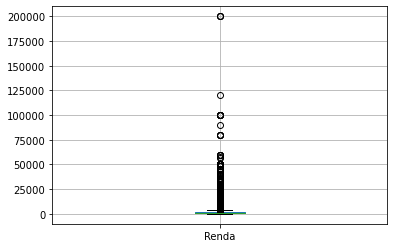

In [76]:
dados.boxplot(['Renda'])

In [77]:
dados['UF'].unique()

array([11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31,
       32, 33, 35, 41, 42, 43, 50, 51, 52, 53], dtype=int64)

In [78]:
dados['Idade'].unique()

array([23, 35, 46, 47, 34, 57, 60, 50, 26, 49, 52, 38, 45, 43, 53, 62, 69,
       41, 25, 33, 44, 65, 32, 30, 64, 31, 63, 40, 28, 37, 39, 36, 73, 56,
       27, 42, 51, 29, 24, 55, 67, 66, 61, 54, 48, 80, 79, 71, 59, 19, 22,
       77, 58, 17, 72, 70, 18, 21, 20, 68, 74, 76, 75, 84, 85, 78, 15, 82,
       95, 13, 83, 81, 87, 88, 16, 91, 92, 97, 89, 90, 86, 94, 14, 99],
      dtype=int64)

In [79]:
print(f'De {dados.Idade.min()} até {dados.Idade.max()} anos')

De 13 até 99 anos


In [80]:
print(f'A estatura média é {dados.Altura.mean().round(3)}')

A estatura média é 1.7


## Distribuição de frequência

array([[<AxesSubplot:title={'center':'Renda'}>]], dtype=object)

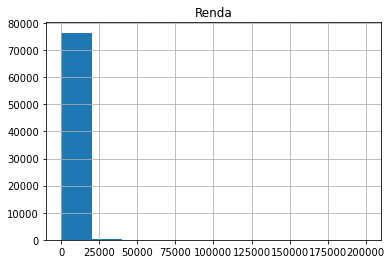

In [81]:
dados.hist('Renda')

In [82]:
dados.Cor.value_counts(normalize = True)*100

8    46.752993
2    41.404217
4    10.920094
0     0.464602
6     0.458095
Name: Cor, dtype: float64

In [83]:
frequencia = dados.Cor.value_counts()

In [84]:
porcentagem = dados.Cor.value_counts(normalize = True)* 100

In [85]:
dist_freq_cor = pd.DataFrame({'Frequencia': frequencia, 'Porcentagem': porcentagem})

In [86]:
dist_freq_cor

,Frequencia,Porcentagem
8,35925,46.752993
2,31815,41.404217
4,8391,10.920094
0,357,0.464602
6,352,0.458095


In [87]:
dist_freq_cor.rename(index = {0: 'Indígena', 2:'Branca', 4:'Preta',6:'Amarela',8:'Parda'}, inplace = True)
dist_freq_cor.rename_axis('Cor', axis=1,inplace = True)

In [88]:
dist_freq_cor

Cor,Frequencia,Porcentagem
Parda,35925,46.752993
Branca,31815,41.404217
Preta,8391,10.920094
Indígena,357,0.464602
Amarela,352,0.458095


In [89]:
frequencia_cor = pd.crosstab(dados.Sexo, dados.Cor)
frequencia_cor.rename(index = {0:'Maculino', 1:'Feminino'}, 
                      columns = {0: 'Indígena', 2:'Branca', 4:'Preta',6:'Amarela',8:'Parda'}, inplace = True)
frequencia_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Maculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [90]:
frequencia_cor = pd.crosstab(dados.Sexo, dados.Cor, aggfunc = 'mean', values = dados.Renda)
frequencia_cor.rename(index = {0:'Maculino', 1:'Feminino'}, 
                      columns = {0: 'Indígena', 2:'Branca', 4:'Preta',6:'Amarela',8:'Parda'}, inplace = True)
frequencia_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Maculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [91]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## Distribuição frequencia renda

In [92]:
classes = [0, 1576, 3152, 7880, 15760, 200000]
labels = ['E','D','C','B','A']
renda = pd.cut(dados.Renda, classes, labels= labels, include_lowest = True)
renda.value_counts()

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [93]:
type(renda.value_counts())

pandas.core.series.Series

In [94]:
frequencia_renda = renda.value_counts()
percentual_renda = renda.value_counts(normalize = True)*100
dist_freq_renda = pd.DataFrame({'Frequencia': frequencia_renda, 'Porcentagem':percentual_renda})
dist_freq_renda

,Frequencia,Porcentagem
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


In [95]:
dist_freq_renda.rename_axis('Renda',axis=1,inplace = True)

In [96]:
dist_freq_renda

Renda,Frequencia,Porcentagem
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


<AxesSubplot:>

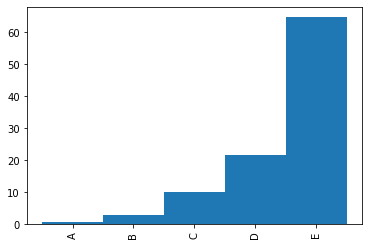

In [125]:
dist_freq_renda.Porcentagem.plot.bar(width=1)

In [98]:
dist_freq_renda.sort_index(ascending= False,inplace=True)

In [99]:
dist_freq_renda

Renda,Frequencia,Porcentagem
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


## Distribuição frequencia estatura

In [100]:
dados.Altura.min()

1.339244614

In [101]:
dados.Altura.median()

1.6993247325

In [102]:
dados.Altura.max()

2.028496765

In [103]:
dados.Altura.describe()

count    76840.000000
mean         1.699512
std          0.079717
min          1.339245
25%          1.645785
50%          1.699325
75%          1.753062
max          2.028497
Name: Altura, dtype: float64

In [104]:
dados.Altura.quantile(.25)

1.645785297

In [105]:
classes = [dados.Altura.min(),dados.Altura.quantile(.25),dados.Altura.quantile(.75),dados.Altura.max()]
labels = ['Pequeno','Medio','Alto']
altura = pd.cut(dados.Altura, bins=classes, labels=labels, include_lowest=True)
altura.value_counts()

Medio      38420
Alto       19210
Pequeno    19210
Name: Altura, dtype: int64

In [106]:
frequencia = altura.value_counts()
porcentagem = altura.value_counts(normalize = True)*100
dist_freq_altura = pd.DataFrame({'Frequencia': frequencia, 'Porcentagem': porcentagem})
dist_freq_altura.rename_axis('Altura', axis = 1, inplace = True)
dist_freq_altura.sort_index(inplace=True)
dist_freq_altura

Altura,Frequencia,Porcentagem
Pequeno,19210,25.0
Medio,38420,50.0
Alto,19210,25.0


## Regra de Sturges

In [109]:
n = dados.shape[0]
n

76840

In [111]:
k = 1 + (10/3) * np.log10(n)
k = int(k.round(0))
k

17

In [114]:
frequencia = pd.value_counts(
                pd.cut(
                    x=dados.Renda,
                    bins = 17,
                    include_lowest= True
                    ),
                sort=False
                )

porcentagem = pd.value_counts(
                pd.cut(
                    x=dados.Renda,
                    bins = 17,
                    include_lowest= True
                    ),
                normalize=True,
                sort=False
                )*100

dist_freq_new_renda = pd.DataFrame({'Frequencia':frequencia,'Porcentagem':porcentagem})
dist_freq_new_renda.rename_axis('Renda', axis=1,inplace=True)
dist_freq_new_renda

Renda,Frequencia,Porcentagem
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


## Histograma

<AxesSubplot:title={'center':'Distribuição de Frequências - Altura'}, xlabel='Metros', ylabel='Count'>

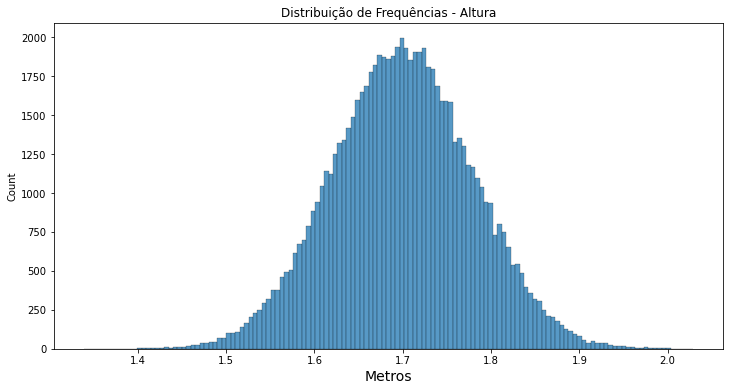

In [119]:
ax = sns.histplot(dados.Altura, kde = False)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Altura')
ax.set_xlabel('Metros', fontsize = 14)
ax

<AxesSubplot:title={'center':'Distribuição de Frequências - Renda'}, xlabel='Reais', ylabel='Count'>

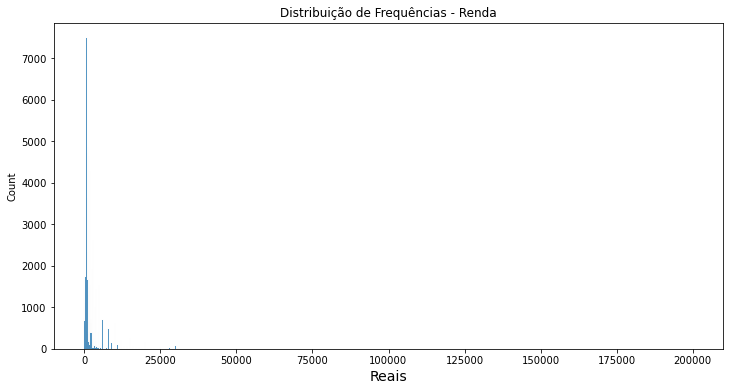

In [120]:
ax = sns.histplot(dados.Renda)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Renda')
ax.set_xlabel('Reais', fontsize = 14)
ax

<AxesSubplot:title={'center':'Distribuição de Frequências - Altura KDE'}, xlabel='Metros', ylabel='Count'>

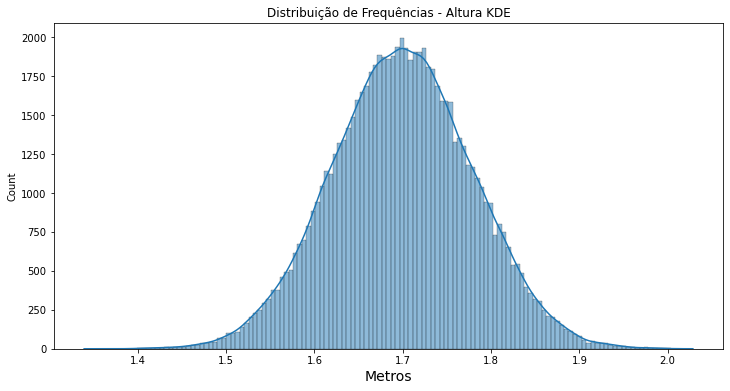

In [124]:
ax = sns.histplot(dados.Altura, kde=True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Altura KDE')
ax.set_xlabel('Metros', fontsize = 14)
ax